In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
merged = pd.read_csv('medallists.csv')
print(merged.head(), merged.describe(), merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   medal_date    2315 non-null   object 
 1   medal_type    2315 non-null   object 
 2   medal_code    2314 non-null   float64
 3   name          2312 non-null   object 
 4   gender        2312 non-null   object 
 5   country_code  2312 non-null   object 
 6   country       2312 non-null   object 
 7   country_long  2312 non-null   object 
 8   nationality   2310 non-null   object 
 9   team          1555 non-null   object 
 10  team_gender   1555 non-null   object 
 11  discipline    2315 non-null   object 
 12  event         2315 non-null   object 
 13  event_type    2315 non-null   object 
 14  url_event     2294 non-null   object 
 15  birth_date    2312 non-null   object 
 16  code_athlete  2315 non-null   int64  
 17  code_team     1555 non-null   object 
dtypes: float64(1), int64(1), obj

In [3]:
#creating goldmedal dataframes
goldmedals = merged[(merged.medal_type == "Gold Medal")]
print(goldmedals.head())

    medal_date  medal_type  medal_code                 name  gender  \
0   2024-07-27  Gold Medal         1.0      EVENEPOEL Remco    Male   
3   2024-07-27  Gold Medal         1.0          BROWN Grace  Female   
6   2024-07-27  Gold Medal         1.0            OH Sanguk    Male   
9   2024-07-27  Gold Medal         1.0  KONG Man Wai Vivian  Female   
12  2024-07-27  Gold Medal         1.0        SMETOV Yeldos    Male   

   country_code           country       country_long       nationality team  \
0           BEL           Belgium            Belgium           Belgium  NaN   
3           AUS         Australia          Australia         Australia  NaN   
6           KOR             Korea  Republic of Korea             Korea  NaN   
9           HKG  Hong Kong, China   Hong Kong, China  Hong Kong, China  NaN   
12          KAZ        Kazakhstan         Kazakhstan        Kazakhstan  NaN   

   team_gender    discipline                          event event_type  \
0          NaN  Cycling 

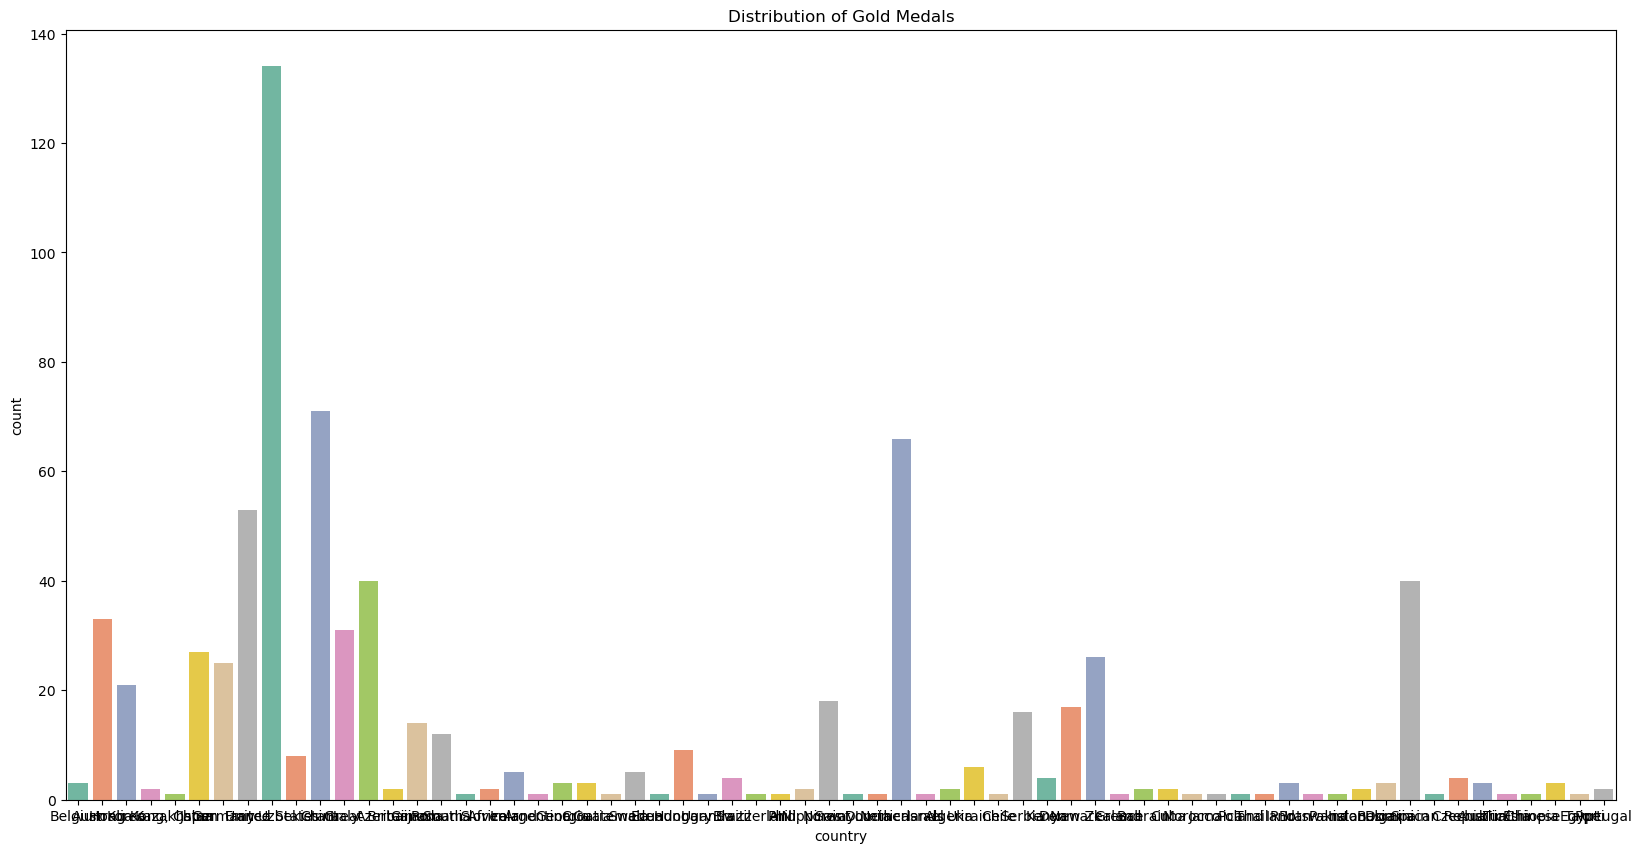

In [4]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Gold Medals')
sns.countplot(x='country', data=goldmedals, palette='Set2')
plt.show()

In [5]:
goldmedals = merged[(merged.medal_type == 'Gold Medal')]
unique_gold_athletes = goldmedals['code_athlete'].nunique()
print(f'Number of unique athletes who won gold medals: {unique_gold_athletes}')

Number of unique athletes who won gold medals: 693


In [6]:
silvermedals = merged[(merged.medal_type == 'Silver Medal')]
unique_silver_athletes = silvermedals['code_athlete'].nunique()
print(f'Number of unique athletes who won Silver medals: {unique_silver_athletes}')

Number of unique athletes who won Silver medals: 735


In [7]:
bronzemedals = merged[(merged.medal_type == 'Bronze Medal')]
unique_bronze_athletes = bronzemedals['code_athlete'].nunique()
print(f'Number of unique athletes who won Bronze medals: {unique_bronze_athletes}')

Number of unique athletes who won Bronze medals: 768


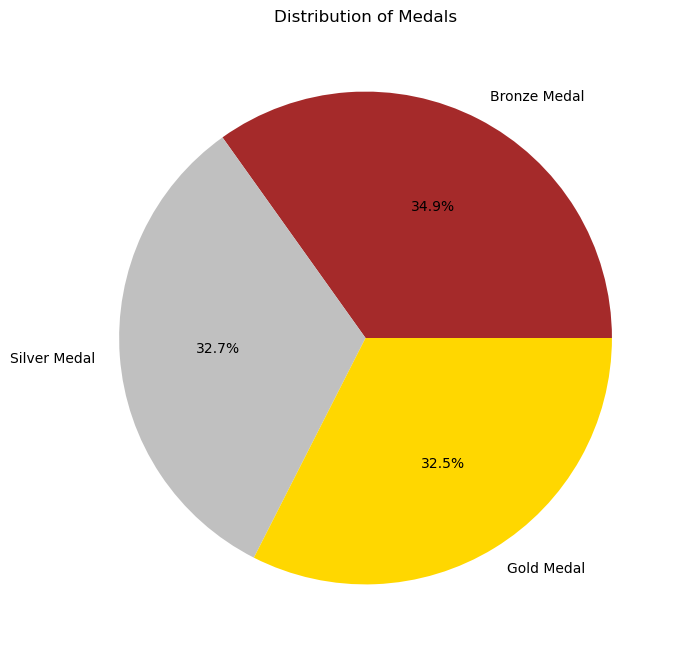

In [15]:
medal_counts = merged['medal_type'].value_counts()
plt.figure(figsize=(8, 8))  
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', colors=['brown', 'silver', 'gold'])
plt.title('Distribution of Medals')
plt.show()

In [9]:
female_medals = merged[(merged['gender'] == 'Female') & (merged['medal_type'].notna())]
unique_female_athletes = female_medals['code_athlete'].nunique()
print(f'Number of unique female athletes who won medals: {unique_female_athletes}')

Number of unique female athletes who won medals: 1004


In [10]:
female_names = female_medals[['name', 'medal_type', 'country']]
print(female_names)

                      name    medal_type           country
3              BROWN Grace    Gold Medal         Australia
4           HENDERSON Anna  Silver Medal     Great Britain
5             DYGERT Chloe  Bronze Medal     United States
9      KONG Man Wai Vivian    Gold Medal  Hong Kong, China
10    MALLO-BRETON Auriane  Silver Medal            France
...                    ...           ...               ...
2310    CENTOFANTI Martina  Bronze Medal             Italy
2311        DURANTI Agnese  Bronze Medal             Italy
2312      MAURELLI Alessia  Bronze Medal             Italy
2313      MOGUREAN Daniela  Bronze Medal             Italy
2314           PARIS Laura  Bronze Medal             Italy

[1162 rows x 3 columns]


In [11]:
india_medals = merged[merged['country'] == 'India']
print(india_medals)

      medal_date    medal_type  medal_code                         name  \
51    2024-07-28  Bronze Medal         3.0                  BHAKER Manu   
194   2024-08-01  Bronze Medal         3.0               KUSALE Swapnil   
512   2024-08-08  Silver Medal         2.0                CHOPRA Neeraj   
632   2024-08-09  Bronze Medal         3.0                    AMAN Aman   
966   2024-07-30  Bronze Medal         3.0                  BHAKER Manu   
967   2024-07-30  Bronze Medal         3.0               SINGH Sarabjot   
1650  2024-08-08  Bronze Medal         3.0            SINGH Jarmanpreet   
1651  2024-08-08  Bronze Medal         3.0            ABHISHEK Abhishek   
1652  2024-08-08  Bronze Medal         3.0               SINGH Manpreet   
1653  2024-08-08  Bronze Medal         3.0                 SINGH Hardik   
1654  2024-08-08  Bronze Medal         3.0                SINGH Gurjant   
1655  2024-08-08  Bronze Medal         3.0                SANJAY Sanjay   
1656  2024-08-08  Bronze 

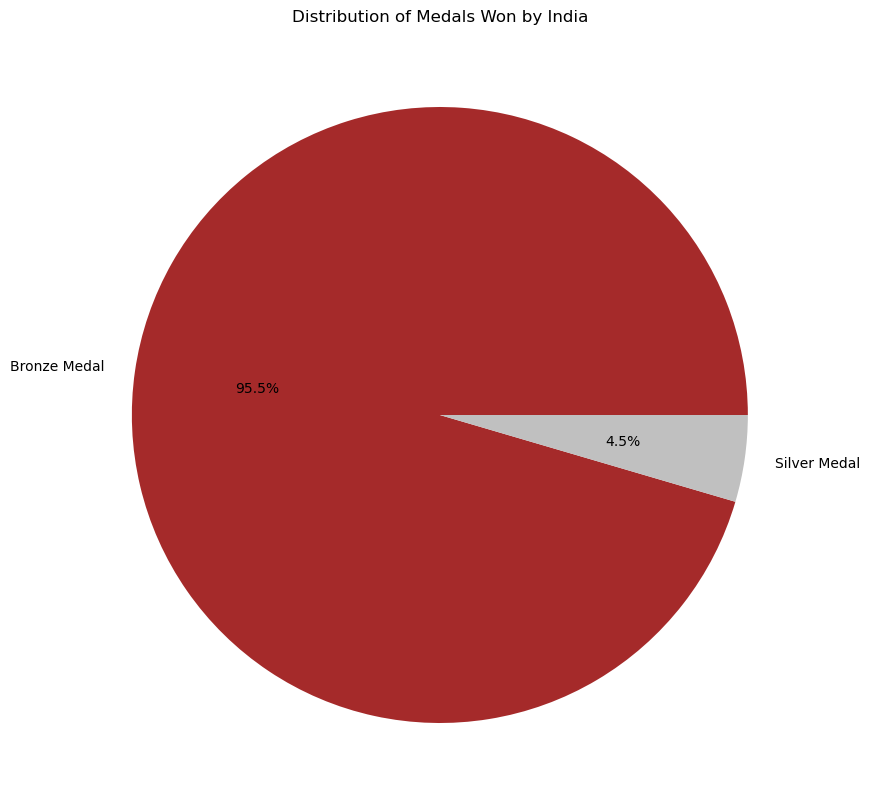

In [12]:
medal_counts = india_medals['medal_type'].value_counts()
plt.figure(figsize=(10, 10))  
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', colors=['brown', 'silver', 'gold'])
plt.title('Distribution of Medals Won by India')
plt.show()

In [13]:
for index, row in india_medals.iterrows():
    print(f"Name: {row['name']}, Medal: {row['medal_type']}, Sport: {row['discipline']}")

Name: BHAKER Manu, Medal: Bronze Medal, Sport: Shooting
Name: KUSALE Swapnil, Medal: Bronze Medal, Sport: Shooting
Name: CHOPRA Neeraj, Medal: Silver Medal, Sport: Athletics
Name: AMAN Aman, Medal: Bronze Medal, Sport: Wrestling
Name: BHAKER Manu, Medal: Bronze Medal, Sport: Shooting
Name: SINGH Sarabjot, Medal: Bronze Medal, Sport: Shooting
Name: SINGH Jarmanpreet, Medal: Bronze Medal, Sport: Hockey
Name: ABHISHEK Abhishek, Medal: Bronze Medal, Sport: Hockey
Name: SINGH Manpreet, Medal: Bronze Medal, Sport: Hockey
Name: SINGH Hardik, Medal: Bronze Medal, Sport: Hockey
Name: SINGH Gurjant, Medal: Bronze Medal, Sport: Hockey
Name: SANJAY Sanjay, Medal: Bronze Medal, Sport: Hockey
Name: SINGH Mandee, Medal: Bronze Medal, Sport: Hockey
Name: SINGH Harmanpreet, Medal: Bronze Medal, Sport: Hockey
Name: UPADHYAY Lalit Kumar, Medal: Bronze Medal, Sport: Hockey
Name: PARATTU RAVEENDRAN Sreejesh, Medal: Bronze Medal, Sport: Hockey
Name: SUMIT Sumit, Medal: Bronze Medal, Sport: Hockey
Name: SING

In [14]:
medal_counts = merged['country'].value_counts()
top_country = medal_counts.idxmax()
top_count = medal_counts.max()
print(f"Country with the highest number of medals: {top_country}")
print(f"Number of medals won: {top_count}")

Country with the highest number of medals: United States
Number of medals won: 330
